<a href="https://colab.research.google.com/github/stheria4/sds510/blob/master/Module6Badge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing FIFA file with Names
**Name:** Sean Theriault
**Student ID:** stheria4
**Course:** SDS 510 – Python for Data Wrangling  
**Date:** 11/26/2025
**Project:** Module 6 Badge

This script imports the necessary libraries.

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Load the FIFA Network and get the names from the columns

In [4]:
# reading the csv straight from my google drive link using  sharable google drive link
file_id = "1TzMmdC6hpL8SjsGb3Y872rbdjjRsFwIl"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)

# get the names for the first column of the FIFA csv file
names = list(df["Unnamed: 0"])

cols = df.columns[1:]


In this script, I added every person as a node, and then I went through the matrix and added an edge whenever the value was greater than zero. At the end, I printed how many nodes and edges the network has and made a plot showing the general structure.

nodes: 450
edges: 5472


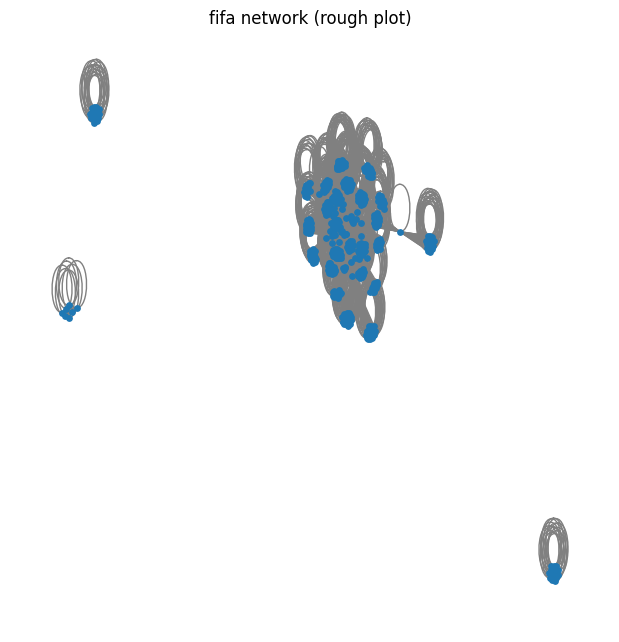

In [5]:
# make a graph
G = nx.Graph()

# add all the nodes
for n in names:
    G.add_node(n)

# go through matrix and add edges for any value > 0
for i in range(len(names)):
    for j in range(len(cols)):
        try:
            val = float(df.iloc[i, j+1])
            if val > 0:
                # connecting person i with person j
                G.add_edge(names[i], cols[j], weight=val)
        except:
            pass

print("nodes:", G.number_of_nodes())
print("edges:", G.number_of_edges())

# plot figure
plt.figure(figsize=(6,6))
nx.draw(G, node_size=15, edge_color="gray")
plt.title("fifa network (rough plot)")
plt.show()




Here I used degree centrality to find the most connected person in the network  - I tried eigenvector first but it kept giving errors. I treated that person as the “weakest link.”

Then I checked how many connected groups the network had before and after removing that person. After removing them, I made another quick plot to show how the network breaks apart.

weakest link (most central?): D HOOGHE Michel
score: 0.26057906458797325
components before: 4
largest size before: 414
components after: 4
largest size after: 413


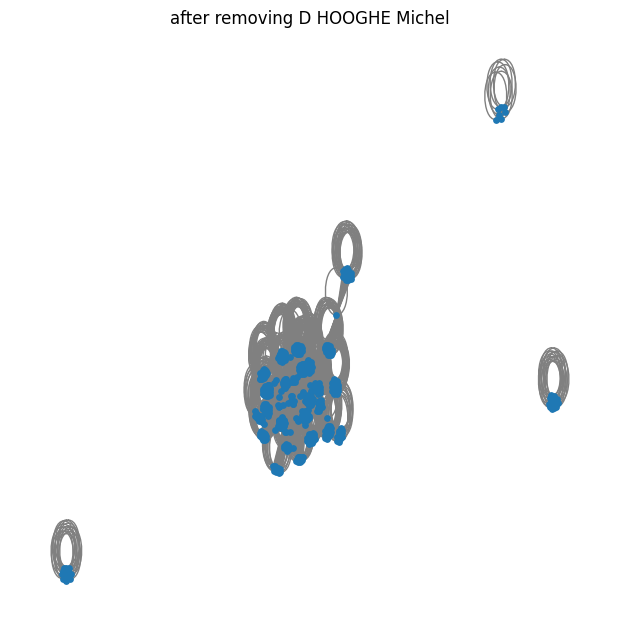

In [6]:
# centrality to find 'important' person
# (used degree because eigenvector kept complaining before)
cent = nx.degree_centrality(G)
weak = max(cent, key=cent.get)

print("weakest link (most central?):", weak)
print("score:", cent[weak])

# components before
comps_before = list(nx.connected_components(G))
print("components before:", len(comps_before))
print("largest size before:", len(max(comps_before, key=len)))

# remove the node
G2 = G.copy()
G2.remove_node(weak)

# components after
comps_after = list(nx.connected_components(G2))
print("components after:", len(comps_after))
print("largest size after:", len(max(comps_after, key=len)))

# draw again (layout will be different because I didn't save pos)
plt.figure(figsize=(6,6))
nx.draw(G2, node_size=15, edge_color="gray")
plt.title("after removing " + weak)
plt.show()

From this, I can see that:

- One node has noticeably higher degree centrality than the others, so it stands out as having the most connections - D HOOGHE Michel.  
- Removing that node changes the global structure of the network: the number of components and the size of the largest component both shift.  
- The network after removal is more fragmented, which means information or influence would have a harder time flowing across the whole group.

This shows how identifying and removing a single central person can weaken the overall connectivity of a network.